In [30]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from typing import List

In [2]:
DATASET_LOC = os.path.join(os.environ['HOME'], 'repos/statistics/training/datasets')
datafiles = ['dataset_SNS_1.npy', 'dataset_SNS_2.npy']

exist = [os.path.exists(os.path.join(DATASET_LOC, f)) for f in datafiles]
if all(exist):
    print('All data files are present.')
else:
    print('Could not find these files:')
    _ = [print(os.path.join(DATASET_LOC, datafiles[i])) for i, e in enumerate(exist) if not e]

All data files are present.


In [3]:
sns1 = np.load(os.path.join(DATASET_LOC, datafiles[0]))
sns2 = np.load(os.path.join(DATASET_LOC, datafiles[1]))

In [5]:
def plot_ts(t: List[int], X: List[float], title: str, xlabel: str='time', ylabel: str='time') -> None:
    assert len(t) == len(X)
    plt.plot(t, X)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

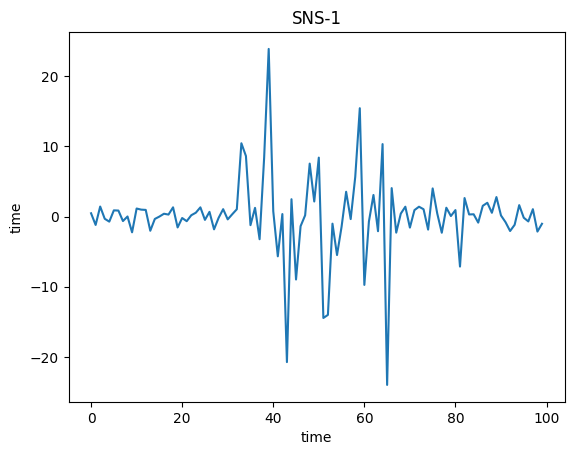

In [6]:
plot_ts([t for t in range(len(sns1))], sns1, 'SNS-1')

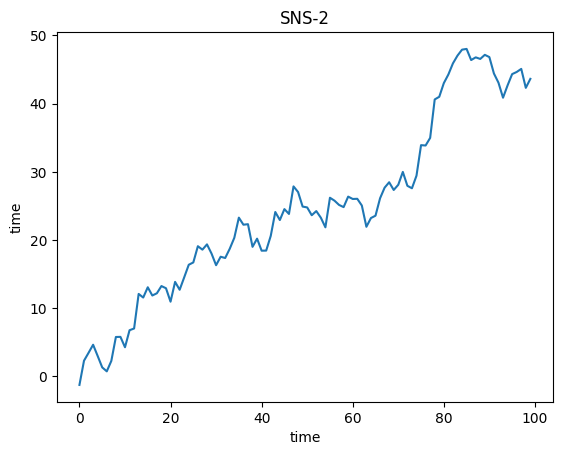

In [7]:
plot_ts([t for t in range(len(sns2))], sns2, 'SNS-2')

# Simple tests of non-stationarity

We check if the mean and the variance of the data remains constant.

In [10]:
print(f'The size of the first dataset is {len(sns1)}.')

The size of the first dataset is 100.


We can split it into $10$ chunks and compute mean and variances for each.

In [15]:
def print_chunk_stats(X: np.ndarray, chunk_size: int) -> None:
    _ = [print(f'Chunk: {i}, mean: {np.mean(c):0.6f}, variance: {np.var(c):0.6f}') 
         for i, c in enumerate(np.split(X, chunk_size))]

In [16]:
print_chunk_stats(sns1, 10)

Chunk: 0, mean: -0.143683, variance: 1.106487
Chunk: 1, mean: 0.121089, variance: 1.165217
Chunk: 2, mean: 0.047148, variance: 0.766352
Chunk: 3, mean: 4.920835, variance: 59.919930
Chunk: 4, mean: -2.326270, variance: 55.946820
Chunk: 5, mean: -0.370650, variance: 79.168351
Chunk: 6, mean: -1.950849, variance: 77.815612
Chunk: 7, mean: 0.346349, variance: 3.188395
Chunk: 8, mean: 0.304831, variance: 7.293030
Chunk: 9, mean: -0.519078, variance: 1.346946


In [17]:
print_chunk_stats(sns2, 10)

Chunk: 0, mean: 2.818615, variance: 4.502582
Chunk: 1, mean: 10.510830, variance: 9.303438
Chunk: 2, mean: 16.022528, variance: 7.519110
Chunk: 3, mean: 19.732519, variance: 4.978946
Chunk: 4, mean: 23.267753, variance: 9.427078
Chunk: 5, mean: 24.607904, variance: 1.771718
Chunk: 6, mean: 25.543235, variance: 3.960800
Chunk: 7, mean: 32.735778, variance: 22.712995
Chunk: 8, mean: 46.289429, variance: 2.224675
Chunk: 9, mean: 43.773487, variance: 2.478197


# Augmented Dickey-Fuller test

In [25]:
def show_adf_results(X: np.ndarray) -> None:
    res = adfuller([x for x in X if not np.isnan(x)])
    metrics = ['adf', 'pvalue', 'usedlag', 'nobs', 'critical_values', 'icbest']
    _ = [print(f'{m}: {res[i]}') for i, m in enumerate(metrics)]

In [26]:
show_adf_results(sns1)

adf: -3.0324159035016094
pvalue: 0.03197606455861536
usedlag: 8
nobs: 91
critical_values: {'1%': np.float64(-3.50434289821397), '5%': np.float64(-2.8938659630479413), '10%': np.float64(-2.5840147047458037)}
icbest: 562.6505980021761


Quite strange that the augmented Dickey-Fuller test classifies the time series as stationary.

In [27]:
show_adf_results(sns2)

adf: -1.3222642986946496
pvalue: 0.6189258221979334
usedlag: 0
nobs: 99
critical_values: {'1%': np.float64(-3.498198082189098), '5%': np.float64(-2.891208211860468), '10%': np.float64(-2.5825959973472097)}
icbest: 350.66221824604816


This result was expected. We cannot reject the null hypothesis that the time series is non-stationary.